In [1]:
#imports

In [2]:
import tensorflow as tf

In [3]:
import cv2

In [4]:
from matplotlib import pyplot as plt

In [5]:
import imghdr

In [6]:
import os

In [7]:
# A code block for preventing GPU OOM Error.
gpus = tf.config.experimental.list_physical_devices("GPU")
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [8]:
#Cleaning data

In [9]:
data_dir = "data"

In [10]:
os.listdir(data_dir)

['bmw', 'mercedes']

In [11]:
img_exts = ["jpeg","jpg","bmp","png"]

In [12]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in img_exts:
                print("Unsupported type: {}".format(image_path))
                os.remove(image_path)
        except:
            print("Issue with type: {}".format(image_path))
            #os.remove(image_path)

In [13]:
#Loading Data

In [14]:
import numpy as np

In [15]:
data = tf.keras.utils.image_dataset_from_directory("data")

Found 868 files belonging to 2 classes.


In [16]:
data_iterator = data.as_numpy_iterator()
batch = data_iterator.next()

In [17]:
batch[0].shape

(32, 256, 256, 3)

In [18]:
data = data.map(lambda x,y : (x/255, y))

In [19]:
data_iterator = data.as_numpy_iterator()
batch = data_iterator.next()

In [20]:
batch[0].max()

1.0

In [21]:
batch[0].min()

0.0

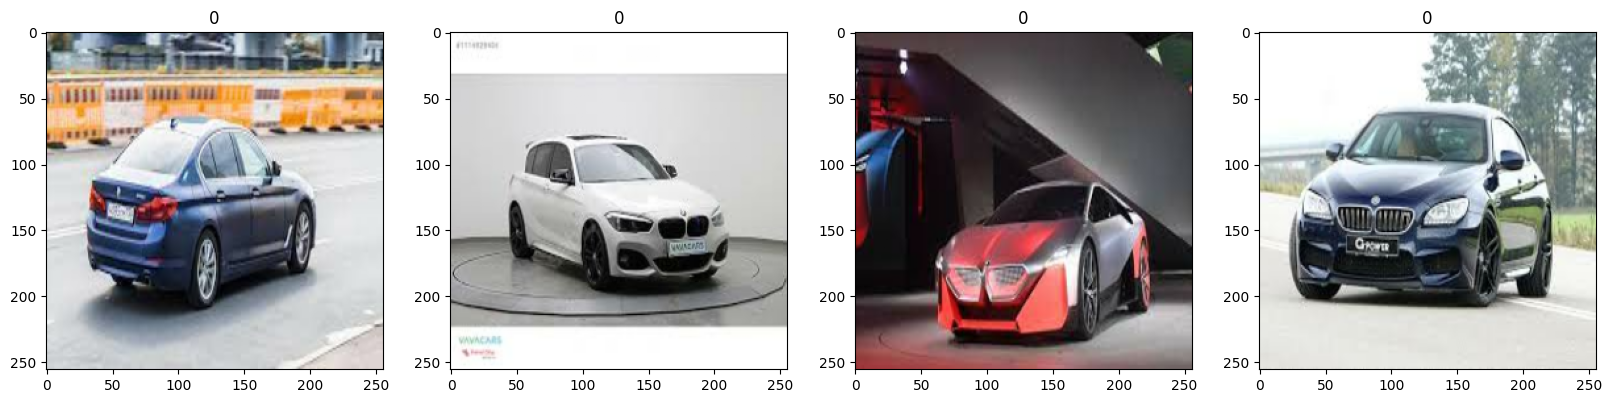

In [22]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

In [23]:
# 0th class points BMW and 1st class points Mercedes-Benz.

In [24]:
#Splitting our pre-processed data into train,validation and test.

In [25]:
len(data)

28

In [26]:
train_data = int(len(data)*0.75)
val_data = int(len(data)*0.1)+1
test_data = int(len(data)*0.1)+2

In [27]:
train_data+val_data+test_data

28

In [28]:
train = data.take(train_data)
val = data.skip(train_data).take(val_data)
test = data.skip(train_data+val_data).take(test_data)

In [29]:
#Creating model

In [30]:
from tensorflow.keras.models import Sequential

In [31]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [32]:
model = Sequential()

model.add(Conv2D(32,(3,3),1, activation = "relu", input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(64,(3,3),1, activation = "relu"))
model.add(MaxPooling2D())

model.add(Conv2D(32,(3,3),1, activation = "relu"))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

In [33]:
model.compile("adam", loss = tf.losses.BinaryCrossentropy(), metrics=["accuracy"])

In [34]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 32)        18464     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 32)       0

In [35]:
logdir = "logs"

In [36]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir = logdir)

In [37]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
21/21 [==============================] - 10s 232ms/step - loss: 0.8864 - accuracy: 0.5104 - val_loss: 0.6925 - val_accuracy: 0.5417
Epoch 2/20
21/21 [==============================] - 5s 235ms/step - loss: 0.6914 - accuracy: 0.5759 - val_loss: 0.6825 - val_accuracy: 0.7396
Epoch 3/20
21/21 [==============================] - 5s 230ms/step - loss: 0.6839 - accuracy: 0.6250 - val_loss: 0.6768 - val_accuracy: 0.5938
Epoch 4/20
21/21 [==============================] - 5s 230ms/step - loss: 0.6115 - accuracy: 0.7158 - val_loss: 0.5053 - val_accuracy: 0.7396
Epoch 5/20
21/21 [==============================] - 5s 230ms/step - loss: 0.4876 - accuracy: 0.7515 - val_loss: 0.3700 - val_accuracy: 0.8333
Epoch 6/20
21/21 [==============================] - 5s 233ms/step - loss: 0.3100 - accuracy: 0.8690 - val_loss: 0.3195 - val_accuracy: 0.8750
Epoch 7/20
21/21 [==============================] - 6s 237ms/step - loss: 0.2058 - accuracy: 0.9301 - val_loss: 0.2295 - val_accuracy: 0.9271
Epoch

In [38]:
hist.history

{'loss': [0.8863998651504517,
  0.691399872303009,
  0.6838592290878296,
  0.6114674806594849,
  0.487601101398468,
  0.3100259304046631,
  0.2058297097682953,
  0.14384853839874268,
  0.08496363461017609,
  0.042134448885917664,
  0.024894850328564644,
  0.023505816236138344,
  0.01512693241238594,
  0.007887893356382847,
  0.007137947250157595,
  0.0025748307816684246,
  0.0023493836633861065,
  0.0007510784780606627,
  0.0002558081760071218,
  0.00015395930677186698],
 'accuracy': [0.5104166865348816,
  0.5758928656578064,
  0.625,
  0.7157738208770752,
  0.7514880895614624,
  0.8690476417541504,
  0.930059552192688,
  0.9553571343421936,
  0.976190447807312,
  0.9895833134651184,
  0.992559552192688,
  0.9910714030265808,
  0.9955357313156128,
  0.9985119104385376,
  0.9985119104385376,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0],
 'val_loss': [0.6924960613250732,
  0.6825172901153564,
  0.6767619252204895,
  0.5053052306175232,
  0.3699960708618164,
  0.3194528818130493,
  0.22945059835910

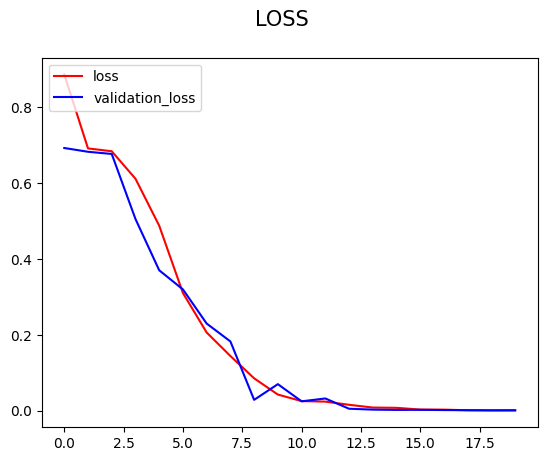

In [39]:
fig = plt.figure()
plt.plot(hist.history["loss"], color = "red", label = "loss")
plt.plot(hist.history["val_loss"], color = "blue", label = "validation_loss")
plt.suptitle("LOSS", fontsize = 15)
plt.legend(loc="upper left")
plt.show()

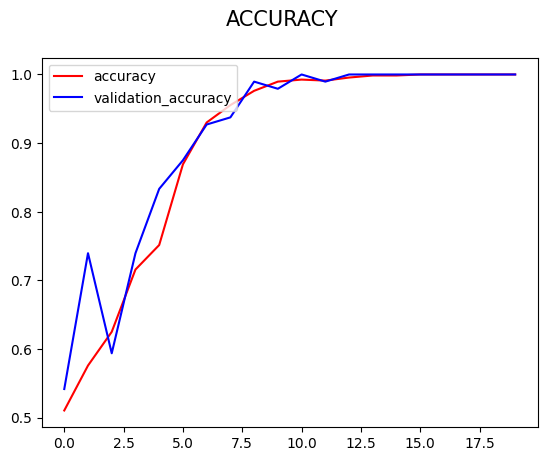

In [40]:
fig = plt.figure()
plt.plot(hist.history["accuracy"], color = "red", label = "accuracy")
plt.plot(hist.history["val_accuracy"], color = "blue", label = "validation_accuracy")
plt.suptitle("ACCURACY", fontsize = 15)
plt.legend(loc="upper left")
plt.show()

In [41]:
#Testing

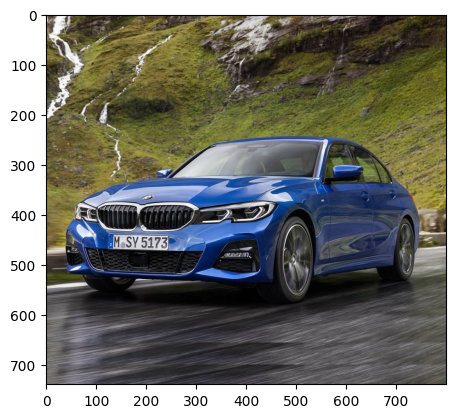

In [50]:
img = cv2.imread("bmw.jpg")
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

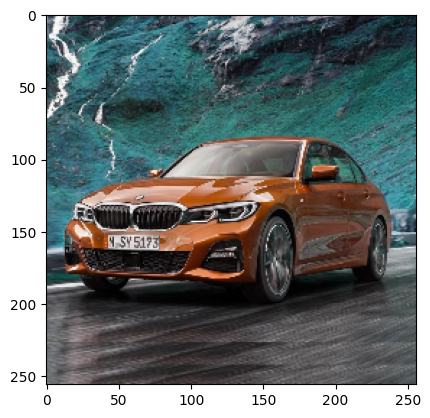

In [51]:
resize = tf.image.resize(img,(256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [52]:
yhat = model.predict(np.expand_dims(resize/255,0))
yhat

1/1 [==============================] - 0s 16ms/step


array([[3.3207354e-05]], dtype=float32)

In [53]:
if ( yhat < 0.5 ):
    print("That is a BMW!")
else:
    print("That is a Mercedes-Benz!")

That is a BMW!
